In [4]:
from IVClassification import *
import numpy as np
import matplotlib.pyplot as plt

## Model
let $g(p) = \ln\left( \frac{p}{1-p} \right)$ be the logit function, $X$ be the treatment, $Y$ be the binary outcome, $U$ be the confounder, and $Z$ be the instrumental variable. The generalized linear model can be defined as:
$$
g(\mathbb{E}[Y|X, U])= \beta^{T}X + \eta U
$$
where
$$
\mathbb{E}[X^{T}U]\neq 0, \quad \mathbb{E}[Z^{T}U]=0
$$


### Linear Case
Let the structrual equation be linear:
$$
X = \alpha Z + \gamma U + \epsilon
$$

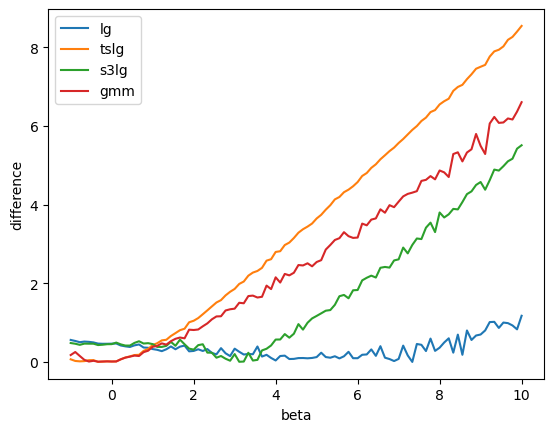

In [5]:
lg_dif = np.array([])
tslg_dif = np.array([])
s3lg_dif = np.array([])
gmm_dif = np.array([])

para_range = np.linspace(-1, 10, 100)

for beta in para_range:
    
    data = sim_data(n=10000, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    
    lg_dif = np.append(lg_dif, np.abs(lg.coef_ - beta))
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_dif = np.append(tslg_dif, np.abs(tslg.coef_ - beta))
    
    s3lg = three_stage_logit()
    s3lg.fit(data.X, data.Y, data.Z)
    s3lg_dif = np.append(s3lg_dif, np.abs(s3lg.coef_ - beta))
    
    gmm = GMM_logit()
    gmm.fit(data.X, data.Y, data.Z)
    gmm_dif = np.append(gmm_dif, np.abs(gmm.coef_ - beta))
    
    
plt.plot(para_range, lg_dif, label='lg')
plt.plot(para_range, tslg_dif, label='tslg')
plt.plot(para_range, s3lg_dif, label='s3lg')
plt.plot(para_range, gmm_dif, label='gmm')
plt.xlabel('beta')
plt.ylabel('difference')
plt.legend()

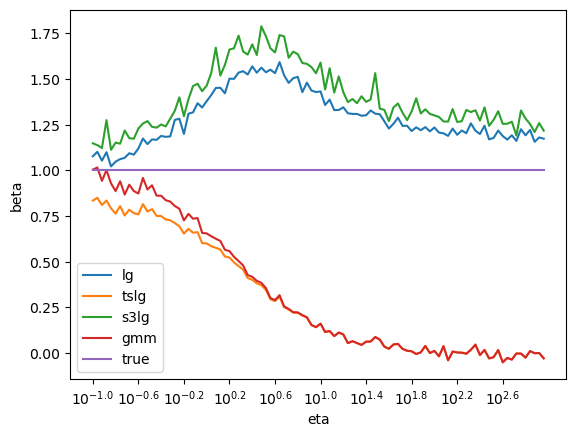

In [ ]:
k = np.linspace(-1, 3, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])
gmm_coef = np.array([])
beta = 1

for eta in np.power(10, k):
    data = sim_data(n=10000, eta=eta, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    s3lg = three_stage_logit()
    s3lg.fit(data.X, data.Y, data.Z)
    s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    gmm = GMM_logit()
    gmm.fit(data.X, data.Y, data.Z)
    gmm_coef = np.append(gmm_coef, gmm.coef_)
    

plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
plt.plot(k, s3lg_coef, label='s3lg')
plt.plot(k, gmm_coef, label='gmm')
plt.plot(k, beta * np.ones(100), label='true')
plt.xticks(k[::10], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::10]])
plt.xlabel('eta')
plt.ylabel('beta')
plt.legend()

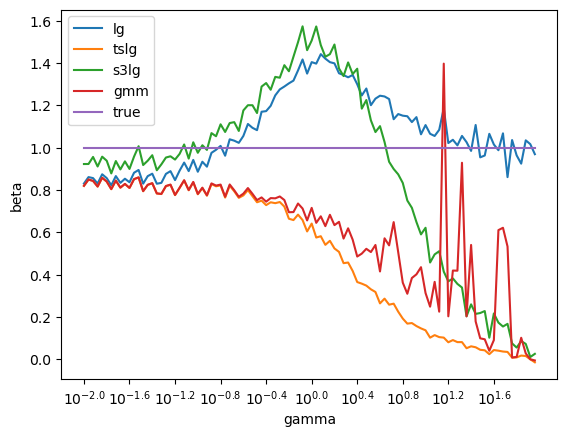

In [16]:
k = np.linspace(-2, 2, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])      
gmm_coef = np.array([])
beta = 1

for gamma in np.power(10, k):
    data = sim_data(n=10000, gamma=gamma, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    s3lg = three_stage_logit()
    s3lg.fit(data.X, data.Y, data.Z)
    s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    gmm = GMM_logit()
    gmm.fit(data.X, data.Y, data.Z)
    gmm_coef = np.append(gmm_coef, gmm.coef_)
    
plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
plt.plot(k, s3lg_coef, label='s3lg')
plt.plot(k, gmm_coef, label = 'gmm')
plt.plot(k, beta * np.ones(100), label='true')
plt.xticks(k[::10], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::10]])
plt.xlabel('gamma')
plt.ylabel('beta')
plt.legend()

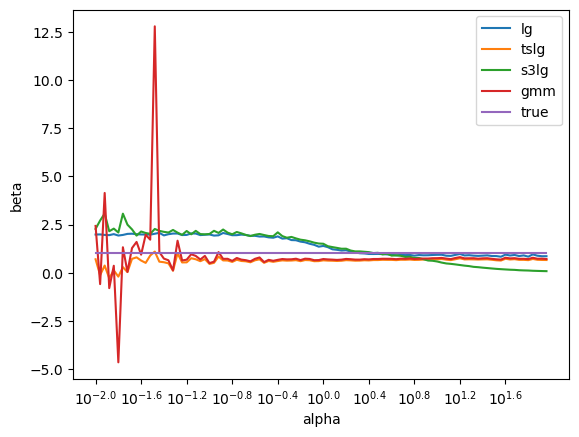

In [6]:
k = np.linspace(-2, 2, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])
gmm_coef = np.array([])
beta = 1

for alpha in np.power(10, k):
    data = sim_data(n=10000, alpha=alpha, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    s3lg = three_stage_logit()
    s3lg.fit(data.X, data.Y, data.Z)
    s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    gmm = GMM_logit()
    gmm.fit(data.X, data.Y, data.Z)
    gmm_coef = np.append(gmm_coef, gmm.coef_)
    
plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
plt.plot(k, s3lg_coef, label='s3lg')
plt.plot(k, gmm_coef, label='gmm')
plt.plot(k, beta * np.ones(100), label='true')
plt.xticks(k[::10], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::10]])
plt.xlabel('alpha')
plt.ylabel('beta')
plt.legend()